In [1]:
import hist 
import uproot
import sys,os
import math
import mplhep as hep
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/lib")
from utils import *
from setting import setting

In [72]:
massList = []
for mass in range(500,1000,50):
    massList.append(mass)
for mass in range(1000,1600,100):
    massList.append(mass)
for mass in range(1600,3200,200):
    massList.append(mass)

[INFO] Add TTTo2L2Nu
[INFO] Add WWTo2L2Nu
[INFO] Add WZTo2Q2L
[INFO] Add ZZTo2Q2L


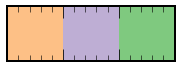

In [3]:
use_helvet = True  ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

#setMcDataPlotsColor
def set_sns_color(*args):
   sns.palplot(sns.color_palette(*args))
   sns.set_palette(*args)
   pass
color_order_bkg = sns.color_palette('Accent', 3)
color_order_bkg.reverse()
set_sns_color(color_order_bkg)


year = '2018'; cutcat = 'resloved'
cat = '2lep'
tag = 'all'
reg = 'SR'

inbkgfile = uproot.open(f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/hist_{year}.root')

varb = 'mass2l2jet_rebin'
hist_bkg = None
hist_sig = None

#add TTbar and vz
samplelist = ['TTTo2L2Nu','WWTo2L2Nu','WZTo2Q2L','ZZTo2Q2L']
#with uproot.open(inbkgfile) as file:
for sample in samplelist:
    print(f'[INFO] Add {sample}')
    if(hist_bkg==None):
        hist_bkg = inbkgfile[f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}'].to_hist()
    else:
        hist_bkg += inbkgfile[f'{sample}/resolved/{reg}/{cat}/{tag}/{varb}'].to_hist()
#add DY
sample = 'DY'
varb = 'massZZ'
hist_bkg += inbkgfile[f'{sample}_resolved_{reg}_{cat}_{tag}_{varb}'].to_hist()

In [6]:
bkg = hist_bkg.values()

In [16]:
for i in range(0,36):
    print(i)
    print(bkg[i:36].sum())

0
76213.58352762483
1
76213.58352762481
2
76213.58352762481
3
76213.05929542298
4
76082.66708457953
5
75442.76098835457
6
65919.93972163637
7
43011.14086553346
8
27188.674288730792
9
17168.555788093858
10
10974.078602360107
11
6912.389553144645
12
4647.5901247123875
13
3398.589375622302
14
2577.3398251815943
15
1975.7756650009283
16
1511.289989430395
17
1177.4299267934168
18
926.0510202653383
19
726.327889817218
20
565.396229102842
21
446.5681322216269
22
349.879464014055
23
270.54304451650773
24
210.62705756844545
25
169.01497301983048
26
131.42843853245535
27
98.06772911097644
28
75.38662691445896
29
56.151001653265475
30
42.582064997483336
31
34.107368051796854
32
25.998586278188913
33
21.291973159552093
34
16.41986375815566
35
4.825239342406483


In [75]:
insigfile = uproot.open(f'/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/SignalModel/Histos_sig_{year}.root')

In [78]:
case = 'resolved'
for mass in [500]:
    str = f"sig{mass}_{case};1"
    hist_sig = insigfile[str].to_hist()
    sig = hist_sig.values()

    cutlist = np.linspace(100,3000,117)
    max = 3000
    y = []
    significant = 0.0
    for i in cutlist:
        if(i <=1900):
            bkgtot = hist_bkg[hist.loc(i):hist.loc(max)].values().sum()
            sigtot = hist_sig[hist.loc(i):hist.loc(max)].values().sum()
            significant = sigtot/math.sqrt(sigtot+bkgtot)
            y.append(significant)
            print(f'significant = {significant} at {mass} cut on {i} in {case}')
        else:
            y.append(significant)
    
    f, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(data=True, llabel='Preliminary', year=year, ax=ax, rlabel=r'%s $fb^{-1}$ (13 TeV)' %setting().config['lumi'][year], fontname='sans-serif')
    ax.plot(cutlist,y,'ro:',label = 'significant', linewidth = 2,markersize=1)
    ax.set_xlabel(r'$M_{ZZ}$ [GeV]', ha='right', x=1.0)
    ax.set_ylabel('Significant', ha='right', y=1.0)
    ax.legend(loc='upper right') 
    plt.savefig(f'significantscan/significant_{mass}_{case}.png')
    plt.close()

significant = 39.76781249727291 at 500 cut on 100.0 in resolved
significant = 39.76781249727291 at 500 cut on 125.0 in resolved
significant = 39.767930941528085 at 500 cut on 150.0 in resolved
significant = 39.767930941528085 at 500 cut on 175.0 in resolved
significant = 39.797424476128334 at 500 cut on 200.0 in resolved
significant = 39.797424476128334 at 500 cut on 225.0 in resolved
significant = 39.94312269883915 at 500 cut on 250.0 in resolved
significant = 39.94312269883915 at 500 cut on 275.0 in resolved
significant = 42.31971507542675 at 500 cut on 300.0 in resolved
significant = 42.31971507542675 at 500 cut on 325.0 in resolved
significant = 50.3945008635044 at 500 cut on 350.0 in resolved
significant = 50.3945008635044 at 500 cut on 375.0 in resolved
significant = 59.75306462673773 at 500 cut on 400.0 in resolved
significant = 59.75306462673773 at 500 cut on 425.0 in resolved
significant = 69.27734073885456 at 500 cut on 450.0 in resolved
significant = 67.28699479391379 at 500

In [67]:
for mass in massList:
    str = f"sig{mass}_resolved;1"
    hist_sig = insigfile[str].to_hist()
    sig = hist_sig.values()

    cutlist = np.linspace(100,3000,117)
    max = 3000
    y = []
    significant = 0.0
    for i in cutlist:
        if(i <=1900):
            bkgtot = hist_bkg[hist.loc(i):hist.loc(max)].values().sum()
            sigtot = hist_sig[hist.loc(i):hist.loc(max)].values().sum()
            significant = sigtot/math.sqrt(sigtot+bkgtot)
            y.append(significant)
        else:
            y.append(significant)
    
    f, ax = plt.subplots(figsize=(10, 10))
    hep.cms.label(data=True, llabel='Preliminary', year=year, ax=ax, rlabel=r'%s $fb^{-1}$ (13 TeV)' %setting().config['lumi'][year], fontname='sans-serif')
    ax.plot(cutlist,y,'ro:',label = 'significant', linewidth = 2,markersize=1)
    ax.set_xlabel(r'$M_{ZZ}$ [GeV]', ha='right', x=1.0)
    ax.set_ylabel('Significant', ha='right', y=1.0)
    ax.legend(loc='upper right') 
    plt.savefig(f'significantscan/significant_{mass}_resolved.png')
    plt.close()



KeyInFileError: not found: 'sig525_resolved' with cycle 1

    Available keys: 'sig550_resolved;1', 'sig500_resolved;1', 'sig650_resolved;1', 'sig750_resolved;1', 'sig850_resolved;1', 'sig950_resolved;1', 'sig1200_resolved;1', 'sig1500_resolved;1', 'sig2000_resolved;1', 'sig2200_resolved;1'...

in file /cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/SignalModel/Histos_sig_2018.root

In [61]:
cutlist = np.linspace(100,3000,)
max = 3000
y = []
significant = 0.0
for i in cutlist:
    if(i <=1900):
        bkgtot = hist_bkg[hist.loc(i):hist.loc(max)].values().sum()
        sigtot = hist_sig[hist.loc(i):hist.loc(max)].values().sum()
        significant = sigtot/math.sqrt(sigtot+bkgtot)
        y.append(significant)
    else:
        y.append(significant)



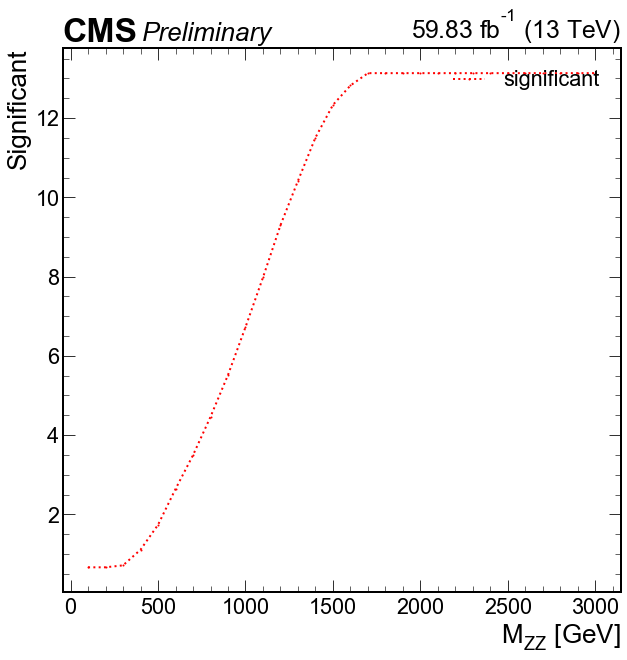

In [62]:
f, ax = plt.subplots(figsize=(10, 10))
hep.cms.label(data=True, llabel='Preliminary', year=year, ax=ax, rlabel=r'%s $fb^{-1}$ (13 TeV)' %setting().config['lumi'][year], fontname='sans-serif')
ax.plot(cutlist,y,'ro:',label = 'significant', linewidth = 2,markersize=1)
ax.set_xlabel(r'$M_{ZZ}$ [GeV]', ha='right', x=1.0)
ax.set_ylabel('Significant', ha='right', y=1.0)
ax.legend(loc='upper right') 
plt.savefig(f'./significant_resolved.png')


# mass point scan

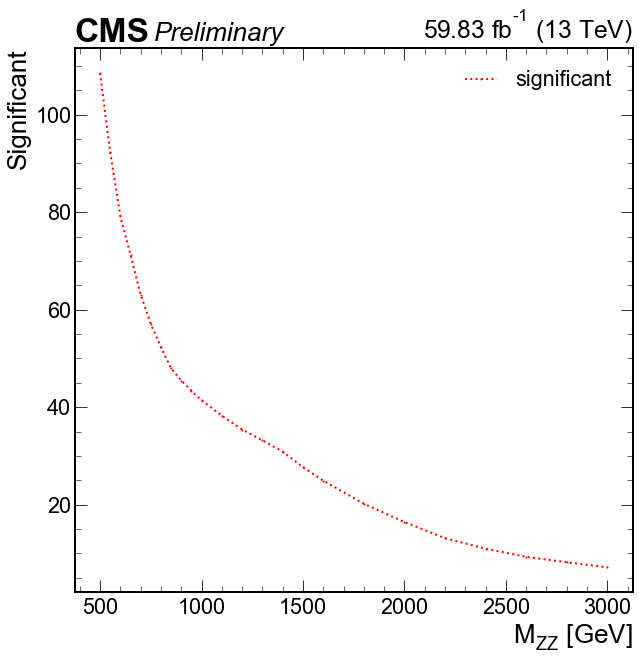

In [81]:

y = []
case = 'resolved'
for mass in massList:
    cut = mass/1.1
    bkgtot=hist_bkg[hist.loc(cut):].values().sum()
    #hist_sig = insigfile['sig{}_{}'.format(mass,case)].to_hist()
    str = f"sig{mass}_{case};1"
    hist_sig = insigfile[str].to_hist()
    #hist_sig = insigfile[f"sig{mass}_resolved;1"].to_hist()
    sigtot = hist_sig[hist.loc(cut):].values().sum()

    #compute
    significant = sigtot/math.sqrt(sigtot+bkgtot)
    y.append(significant)


f, ax = plt.subplots(figsize=(10, 10))
hep.cms.label(data=True, llabel='Preliminary', year=year, ax=ax, rlabel=r'%s $fb^{-1}$ (13 TeV)' %setting().config['lumi'][year], fontname='sans-serif')
ax.plot(massList,y,'ro:',label = 'significant', linewidth = 2,markersize=1)
ax.set_xlabel(r'$M_{ZZ}$ [GeV]', ha='right', x=1.0)
ax.set_ylabel('Significant', ha='right', y=1.0)
ax.legend(loc='upper right') 
plt.savefig(f'./significant_resolved.png')
#plt.close()